In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("epa-sea-level.csv")
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


<Axes: xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

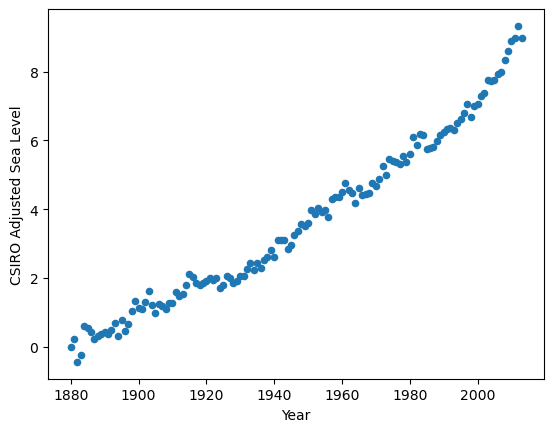

In [4]:
df.plot(kind="scatter",x="Year",y="CSIRO Adjusted Sea Level")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



Slope: 0.0630445840121348
Intercept: -119.06594196773978


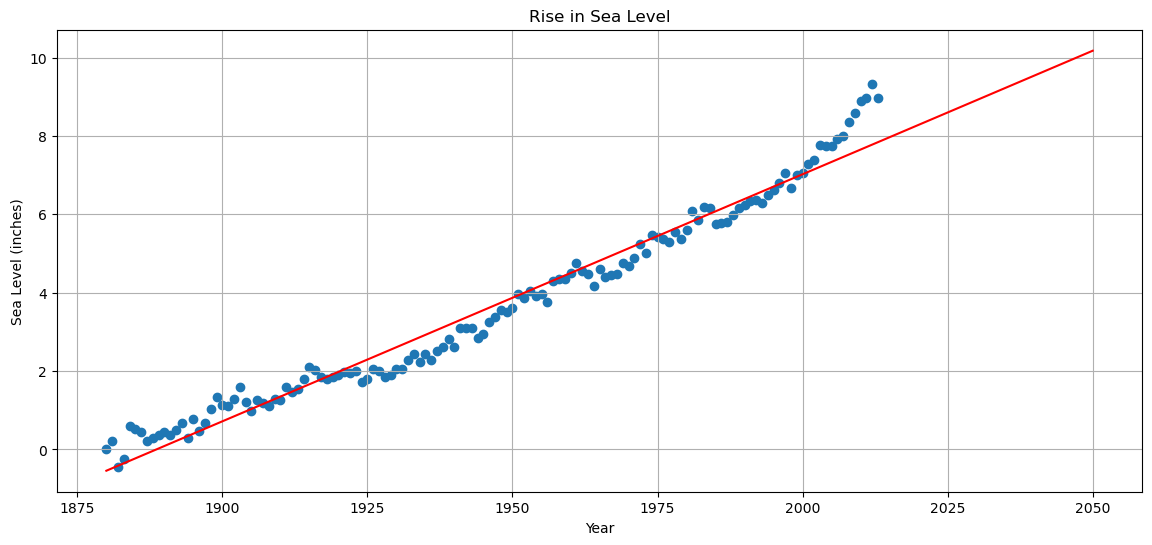

In [11]:
from scipy.stats import linregress


slope, intercept, r_value, p_value, std_err = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# creating a range until 2050
years_extended = pd.Series(range(df["Year"].min(),2051))
sea_levels_pred = slope * years_extended + intercept

# plot
plt.figure(figsize=(14,6))
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"])


plt.plot(years_extended,sea_levels_pred,color="red")

plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")

plt.grid(True)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



## Regressão Linear:
### A fórmula da reta é:

• 𝑦 = slope ⋅ 𝑥 + intercept

Ou seja:

• Nível do mar (y) = 0.12 ⋅ Ano (x) − 232.1

### O que significa:
🔹 slope = 0.12

•Slope (inclinação) representa quanto o nível do mar sobe a cada ano.

•Neste caso, a cada ano que passa, o nível do mar aumenta em 0.12 unidades (provavelmente milímetros, dependendo do seu dataset).

🔹 intercept = -232.1

•Esse é o valor de y (nível do mar) quando x (ano) = 0.

•Ou seja, em um "ano zero" hipotético, o nível do mar seria -232.1.

•Isso não tem significado prático direto, porque esse "ano zero" nem está nos dados, mas o valor é necessário para "ajustar" a reta corretamente.



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



• slope: Inclinação da reta (quanto y varia para cada unidade de x)

• intercept: Intercepto da reta (valor de y quando x = 0)

• r_value: Correlação de Pearson entre x e y (pode ser usado como medida de força da relação linear)

• p_value: Valor-p para testar a hipótese de que o slope é 0 (sem relação linear)

• std_err: Erro padrão da estimativa do slope